In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_swing = pd.read_csv('data/2008_swing_states.csv')
df_all = pd.read_csv('data/2008_all_states.csv')

In [3]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


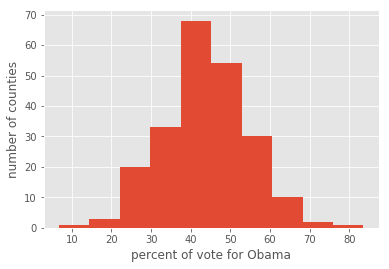

In [4]:
_ = plt.hist(df_swing['dem_share'])

_ = plt.xlabel('percent of vote for Obama')

_ = plt.ylabel('number of counties')

plt.show()

## Setting the bins of a hist

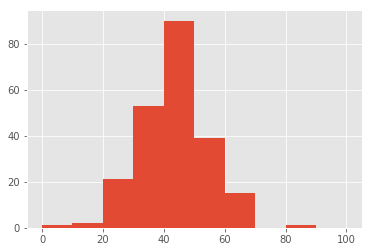

In [9]:
bin_edges = [0, 10, 20, 30, 40, 50,60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
plt.show()

## Seaborn

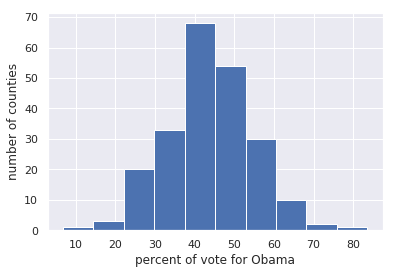

In [8]:
import seaborn as sns
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

# Let’s practice!

In [9]:
iris = sns.load_dataset("iris")

In [10]:
versicolor  = iris[iris.species == 'versicolor']
versicolor_petal_length =  versicolor.petal_length

In [11]:
setosa  = iris[iris.species == 'setosa']
setosa_petal_length =  setosa.petal_length

In [12]:
virginica  = iris[iris.species == 'virginica']
virginica_petal_length =  virginica.petal_length

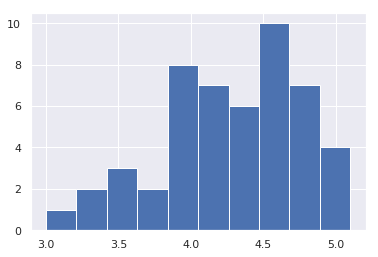

In [13]:
# Import plotting modules

import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram

plt.show()

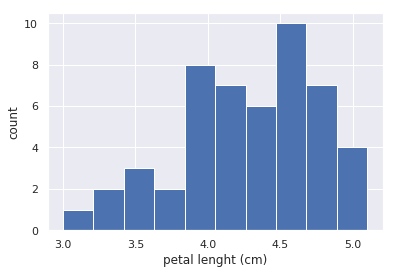

In [14]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes

_ = plt.xlabel('petal lenght (cm)')
_ = plt.ylabel('count')
# Show histogram

plt.show()

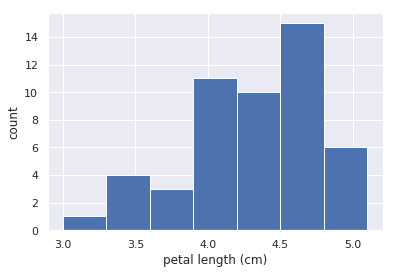

In [15]:
# Import numpy
import numpy as np

# Compute number of data points: n_data

len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(versicolor_petal_length))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram

_ = plt.hist(versicolor_petal_length, bins= n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

# Plot all of your data: Bee swarm plots

## Binning bias

- The same data may be interpreted differently
depending on choice of bins

## Bee swarm plot


# Organization of the data frame

- each column is a feature
- each row is an observation

In this case an observation is a county, the featurs are the state & the dem_vote

```python
  state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04
```

In [18]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


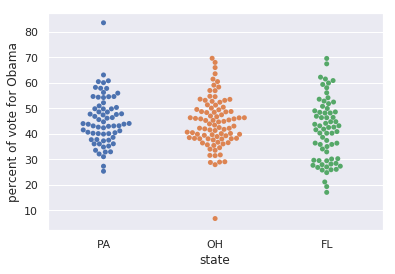

In [19]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

# Let’s practice!

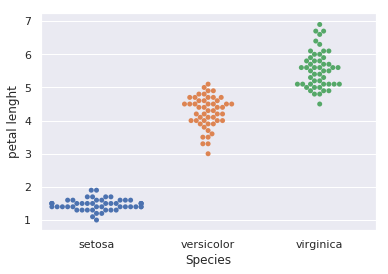

In [20]:
# Create bee swarm plot with Seaborn's default settings

_ = sns.swarmplot(x='species',y='petal_length',data=iris)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('petal lenght')

# Show the plot
plt.show()

# Plot all of your data: ECDFs

## 2008 US election results: East and West

In [16]:
df_all.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


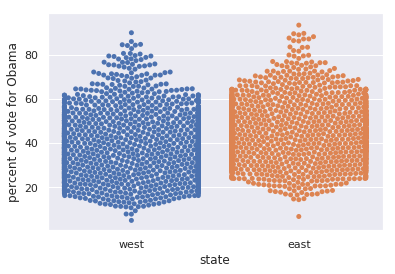

In [22]:
_ = sns.swarmplot(x='east_west', y='dem_share', data=df_all)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

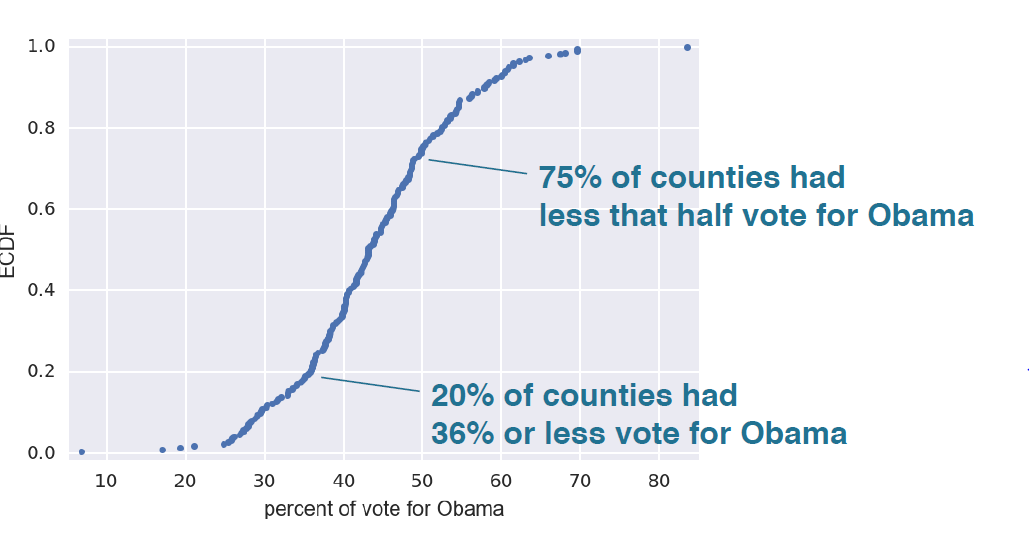

## Empirical cumulative distribution function (ECDF)

Displays the percentage of swing states votes that went to Obama

- The $x$ value of an ECDF is the quantity you are mesuring, in this case the percentage of votes that went to Obama

- The $y$ value is the fraction of datapoints that have a value smaller thatn the corresponding $x$ value.


### Example
- 20% of countires in swing states had 36 % or less  of its people vot for OBama
- 75% of counties in swing states had 50% or less of its people vite for Obama.


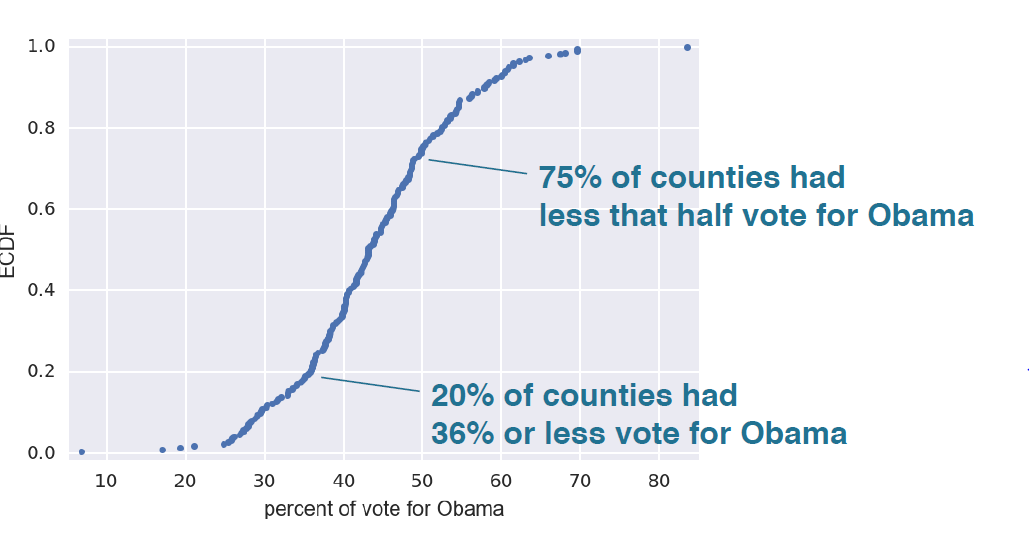

## Making an ECDF
- x axis is the sorted data
- y axis is evenly spaced data points with a maximun of one

In [23]:
df_swing['dem_share'].describe()

count    222.000000
mean      43.764414
std       10.712770
min        6.800000
25%       37.302500
50%       43.185000
75%       49.925000
max       83.560000
Name: dem_share, dtype: float64

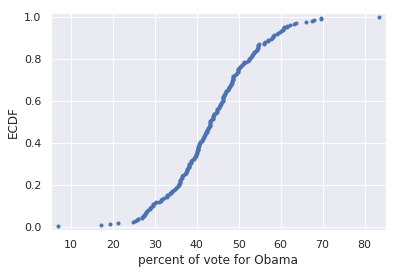

In [19]:
import numpy as np
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

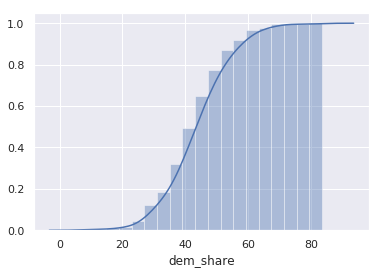

In [26]:
sns.distplot(df_swing['dem_share'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.show()

# Let’s practice!

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [22]:
ecdf(versicolor_petal_length)

(array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
        4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
        4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1]),
 array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
        0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
        0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
        0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
        0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))

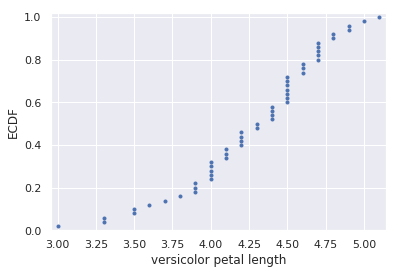

In [29]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot


_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

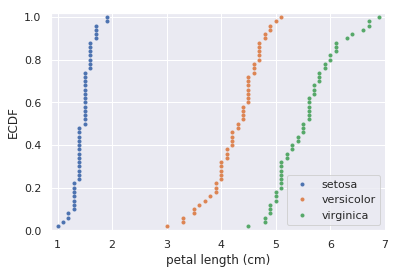

In [23]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Make nice margins
plt.margins(0.02)


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2008 US swing states election ECDFs

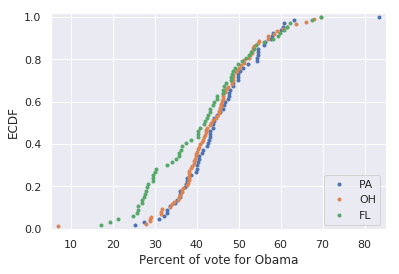

In [31]:
# set values
PA = df_swing[df_swing.state == 'PA'].dem_share
OH = df_swing[df_swing.state == 'OH'].dem_share
FL = df_swing[df_swing.state == 'FL'].dem_share

# Compute ECDFs
x_PA, y_PA = ecdf(PA)
x_OH, y_OH = ecdf(OH)
x_FL, y_FL = ecdf(FL)


# Plot all ECDFs on the same plot
_ = plt.plot(x_PA, y_PA, marker='.', linestyle='none')

_ = plt.plot(x_OH, y_OH , marker='.', linestyle='none')

_ = plt.plot(x_FL, y_FL, marker='.', linestyle='none')


# Make nice margins
plt.margins(0.02)


# Annotate the plot
plt.legend(('PA', 'OH', 'FL'), loc='lower right')
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()